# Question: 
You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [2]:
# first importing the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data
df = pd.read_csv('Ecommerce Customers')

In [4]:
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [5]:
# for getting statistical information
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory data analysis:
* in this analysis we will using the numerical data

In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
sns.set_style('whitegrid')

#### because the company want to know for profit which help most between App and Website.

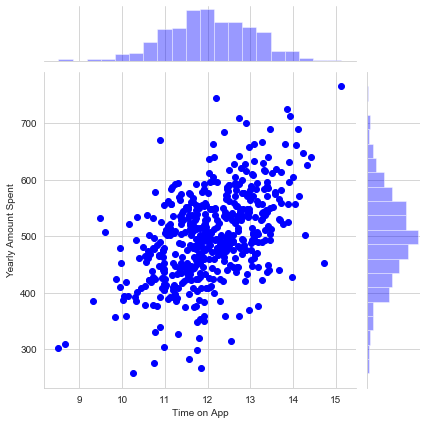

In [9]:
# we make joint plot to compare 'Time on App' and 'Yearly Amount Spent'.

sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df, color='blue')

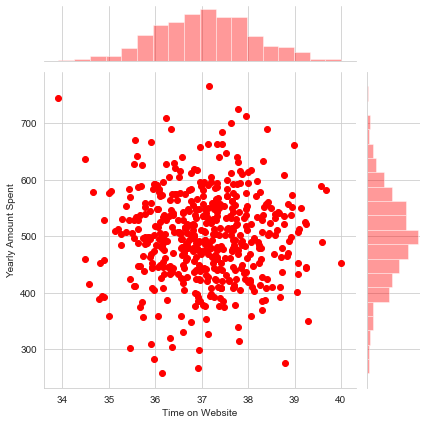

In [10]:
# also make a joint plot to compare 'Time on Website' and 'Yearly Amount Spent'.

sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = df, color = 'red')

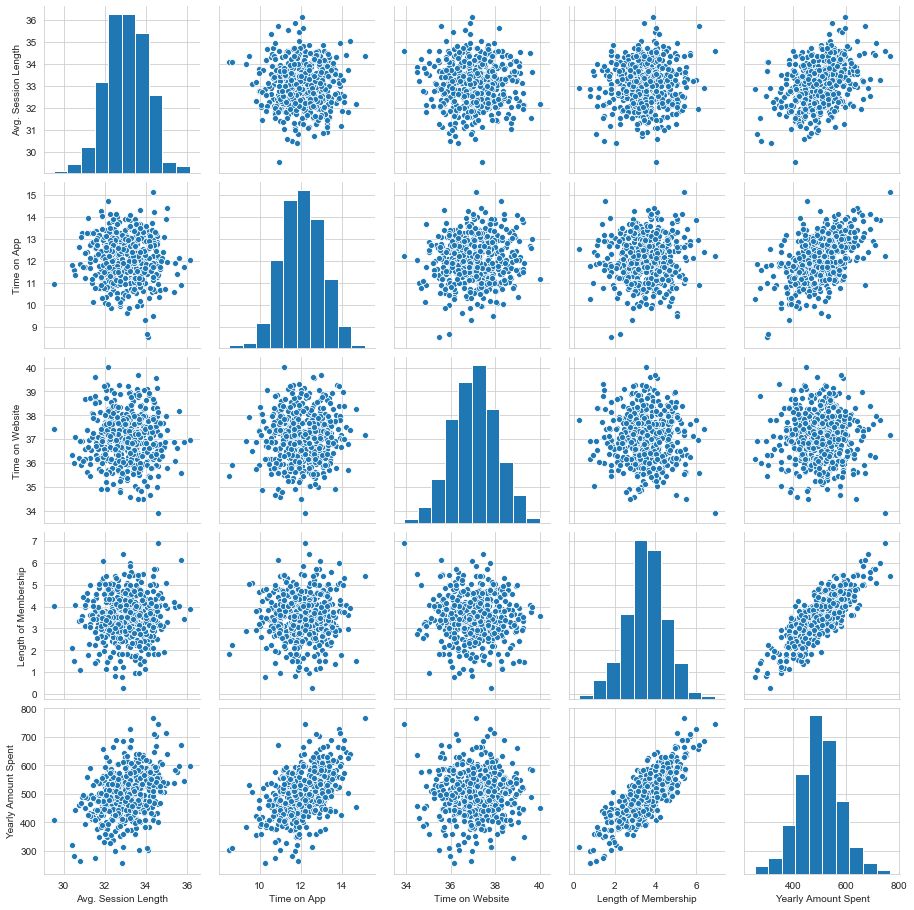

In [11]:
# now see how the entire data set make co-realation between them

sns.pairplot(df)

#### Using pair plot we can see the most corelated featre with 'Yearly Amount Spent' is 'Length of Membership'

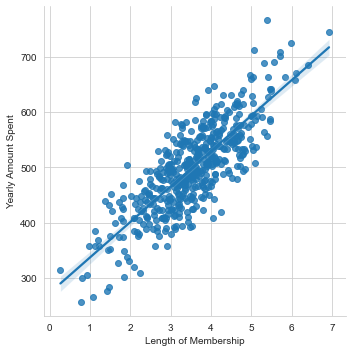

In [12]:
# so now we can create a linear model plot to see how the relation look like

sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df)

# Training and Testing Data
* we have explore data little bit and find the most co-related feature.
* now train and test the model

In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
# set X for the numerical features. using this features our model predict target feature.
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [15]:
# set y as which feature our model can predict
y = df['Yearly Amount Spent']

In [16]:
# spliting data into training and testing set

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the MOdel

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# make a model using linear_regression object

my_model = LinearRegression()

In [29]:
# train the model with training data

my_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Test Data

In [30]:
prediction = my_model.predict(X_test)

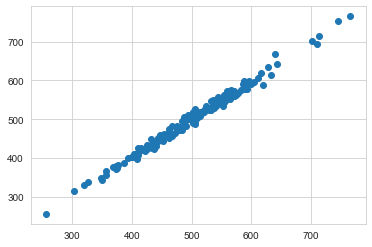

In [31]:
# creating a Scatter plot to see how the real test values predict the target features

plt.scatter(y_test, prediction)


# Residuals
* checking the model fitness with our data

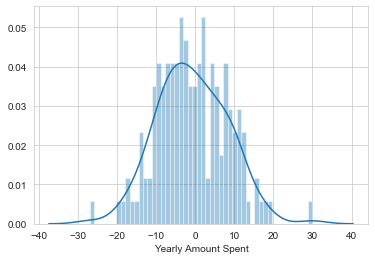

In [32]:
# we create a histogram for make sure our model prediction looks normally distributed
sns.distplot((y_test - prediction), bins = 50)

## Evaluating the Model

In [35]:
import numpy as np

In [34]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


# Accuracy test

In [45]:
print('Accuracy_rate:', metrics.explained_variance_score(y_test,prediction))

Accuracy_rate: 0.9890771231889606


# Conclusion

In [47]:
data = my_model.coef_
data

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [49]:
c_df = pd.DataFrame(data, index = X.columns, columns = ['coeff'])

In [50]:
c_df

,coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Ans: So 1 unit increase of length of membership is associated with 61.27 dollar of profit